# Color bimodality in the galaxy population

Galaxies were first categorized according to morphology by Hubble in his paper from 1926. Later, it has been established that there are several other variables which correlate with this initial categorization into spiral (late type) and elliptical (early type) galaxies. One of them is the color of the galaxy. Colors are measured as the difference in magnitude for different optical filters, corresponding to dividing the luminosity of one passband by another. 
$$ \Delta m_{g-r} = m_g - m_r $$

It has been found that early type galaxies are more likely to be redder in color, while late type galaxies are more blue. There are many reasons why this is the case, as there are many variables which affect the color of a galaxy. Some are: stellar age, stellar metallicity, the amount of dust, the amount of gas, the metallicity of the gas and star formation.

In [1]:
import illustris_python as il
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lateType = pd.read_pickle("../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_lateType_Gas.pkl")
earlyType = pd.read_pickle("../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_earlyType_Gas.pkl")
data = pd.read_pickle("../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM.pkl")
data["SubhaloMassStellar"] *= 10**10
lateType["SubhaloMassStellar"] *= 10**10
earlyType["SubhaloMassStellar"] *= 10**10


In the IllustrsTNG data, the information about the different passband magnitudes are found in the tag "SubhaloStellarPhotometrics". This contains the magnitudes for 8 different passbands. The colors must be calculated manually by comparing the desired filters. The early and late type galaxies are plotted seperately, as well as the entire population, to be able to compare the two types.

In [2]:
def magnitudes(n, name, df):
    key = name + "-band"
    temp = np.array(list(df["SubhaloStellarPhotometrics"]))
    df[key] = temp[:,n]
    return df

def colors(c1, c2, df):
    key = c1+"-"+c2
    a,b  = c1 + "-band", c2 + "-band"
    df[key] = df[a]-df[b]
    return df


bands = ["U", "B", "V", "K", "g","r","i","z"]
dataframes = [data, lateType, earlyType]

for n in range (len(bands)):
    #Separating out filters into their own columns for plotting
    for dataframe in dataframes:
        dataframe = magnitudes(n, bands[n], dataframe)
for dataframe in dataframes:  
    #Calculating the filter difference/color. Bluer - redder.  
    dataframe = colors("g", "r", dataframe)
    dataframe = colors("r", "i", dataframe)
    dataframe = colors("U", "r", dataframe)
    dataframe = colors("U", "i", dataframe)

plotting different waveband magnitudes

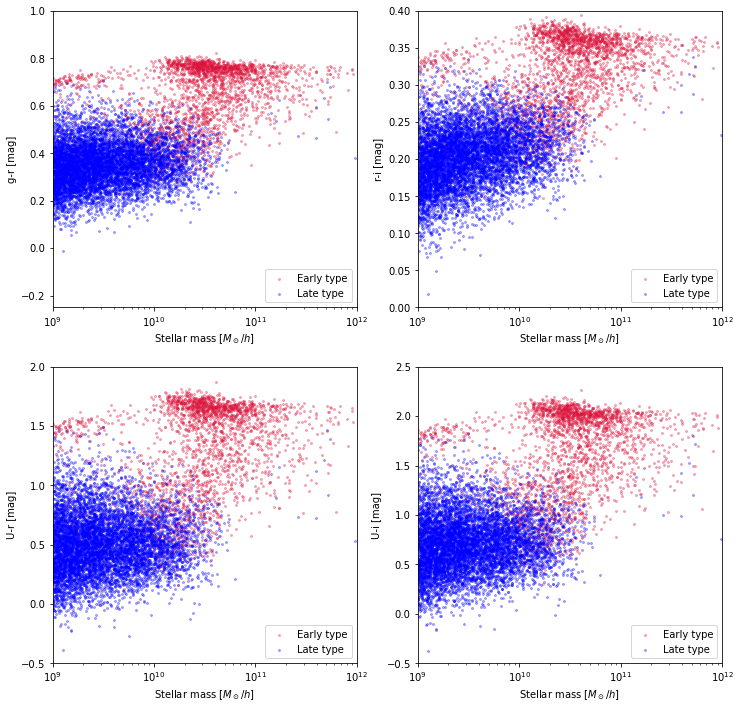

In [3]:

fig1, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))
#fig1.suptitle("Color - mass diagram", fontsize = 16)

earlyType.plot.scatter(x="SubhaloMassStellar", y = "g-r", ax = axs[0,0], color = "crimson", alpha=0.3, s = 4, label = "Early type")
lateType.plot.scatter(x="SubhaloMassStellar", y = "g-r", ax = axs[0,0], color = "blue", alpha=0.3, s = 4, label = "Late type")
il.formatplot.C_SM(type = "g-r", df = earlyType, ax = axs[0,0], y0 = -0.25)

earlyType.plot.scatter(x="SubhaloMassStellar", y = "r-i", ax = axs[0,1], color = "crimson", alpha=0.3, s = 4, label = "Early type")
lateType.plot.scatter(x="SubhaloMassStellar", y = "r-i", ax = axs[0,1], color = "blue", alpha=0.3, s = 4, label = "Late type")
il.formatplot.C_SM(type = "r-i", df = earlyType, ax = axs[0,1], y0 = 0, y1 = 0.4)


earlyType.plot.scatter(x="SubhaloMassStellar", y = "U-r", ax = axs[1,0], color = "crimson", alpha=0.3, s = 4, label = "Early type")
lateType.plot.scatter(x="SubhaloMassStellar", y = "U-r", ax = axs[1,0], color = "blue", alpha=0.3, s = 4, label = "Late type")
il.formatplot.C_SM(type = "U-r", df = earlyType, ax = axs[1,0], y0 = -0.5, y1 = 2)


earlyType.plot.scatter(x="SubhaloMassStellar", y = "U-i", ax = axs[1,1], color = "crimson", alpha=0.3, s = 4, label = "Early type")
lateType.plot.scatter(x="SubhaloMassStellar", y = "U-i", ax = axs[1,1], color = "blue", alpha=0.3, s = 4, label = "Late type")
il.formatplot.C_SM(type = "U-i", df = earlyType, ax = axs[1,1], y0 = -0.5, y1 = 2.5)
plt.savefig("../fig/CB/colormag.png")


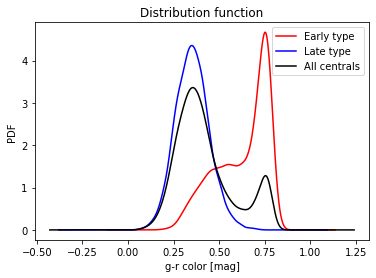

In [4]:
fig3, ax3 = plt.subplots()
ser1, ser2, ser3 = earlyType["g-r"], lateType["g-r"], data["g-r"]
ser1.plot.kde(ax = ax3, color = "red", label = "Early type")
ser2.plot.kde(ax = ax3, color = "blue", label = "Late type")
ser3.plot.kde(ax = ax3, color = "black", label = "All centrals")

il.formatplot.PDF_C(type = "g-r")

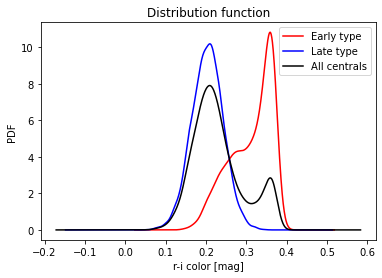

In [5]:
fig4, ax4 = plt.subplots()
ser1, ser2, ser3 = earlyType["r-i"], lateType["r-i"], data["r-i"]
ser1.plot.kde(ax = ax4, color = "red", label = "Early type")
ser2.plot.kde(ax = ax4, color = "blue", label = "Late type")
ser3.plot.kde(ax = ax4, color = "black", label = "All centrals")

il.formatplot.PDF_C(type = "r-i")